In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [5]:
# Weight and Bias, initialized randomly
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b)
def linear_regression(x):
    return W * x + b

# Mean square error
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [6]:
# Optimization process
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        
    # Compute gradients
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [8]:
# Run training for the given number of steps
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.269329, W: 0.387862, b: -0.166985
step: 100, loss: 0.244413, W: 0.372272, b: -0.056464
step: 150, loss: 0.224874, W: 0.358467, b: 0.041409
step: 200, loss: 0.209550, W: 0.346242, b: 0.128082
step: 250, loss: 0.197533, W: 0.335415, b: 0.204836
step: 300, loss: 0.188109, W: 0.325828, b: 0.272807
step: 350, loss: 0.180718, W: 0.317337, b: 0.333000
step: 400, loss: 0.174922, W: 0.309819, b: 0.386304
step: 450, loss: 0.170377, W: 0.303160, b: 0.433509
step: 500, loss: 0.166813, W: 0.297264, b: 0.475311
step: 550, loss: 0.164017, W: 0.292042, b: 0.512330
step: 600, loss: 0.161825, W: 0.287418, b: 0.545113
step: 650, loss: 0.160106, W: 0.283323, b: 0.574144
step: 700, loss: 0.158758, W: 0.279697, b: 0.599853
step: 750, loss: 0.157700, W: 0.276486, b: 0.622620
step: 800, loss: 0.156871, W: 0.273642, b: 0.642781
step: 850, loss: 0.156221, W: 0.271124, b: 0.660635
step: 900, loss: 0.155711, W: 0.268893, b: 0.676446
step: 950, loss: 0.155311, W: 0.266918, b: 0.690448
step: 1000,

In [9]:
import matplotlib.pyplot as plt

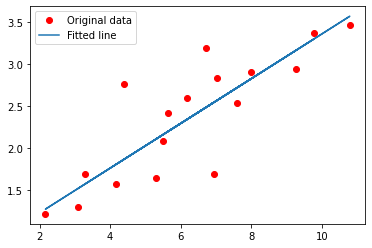

In [11]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()